<IPython.core.display.Javascript object>


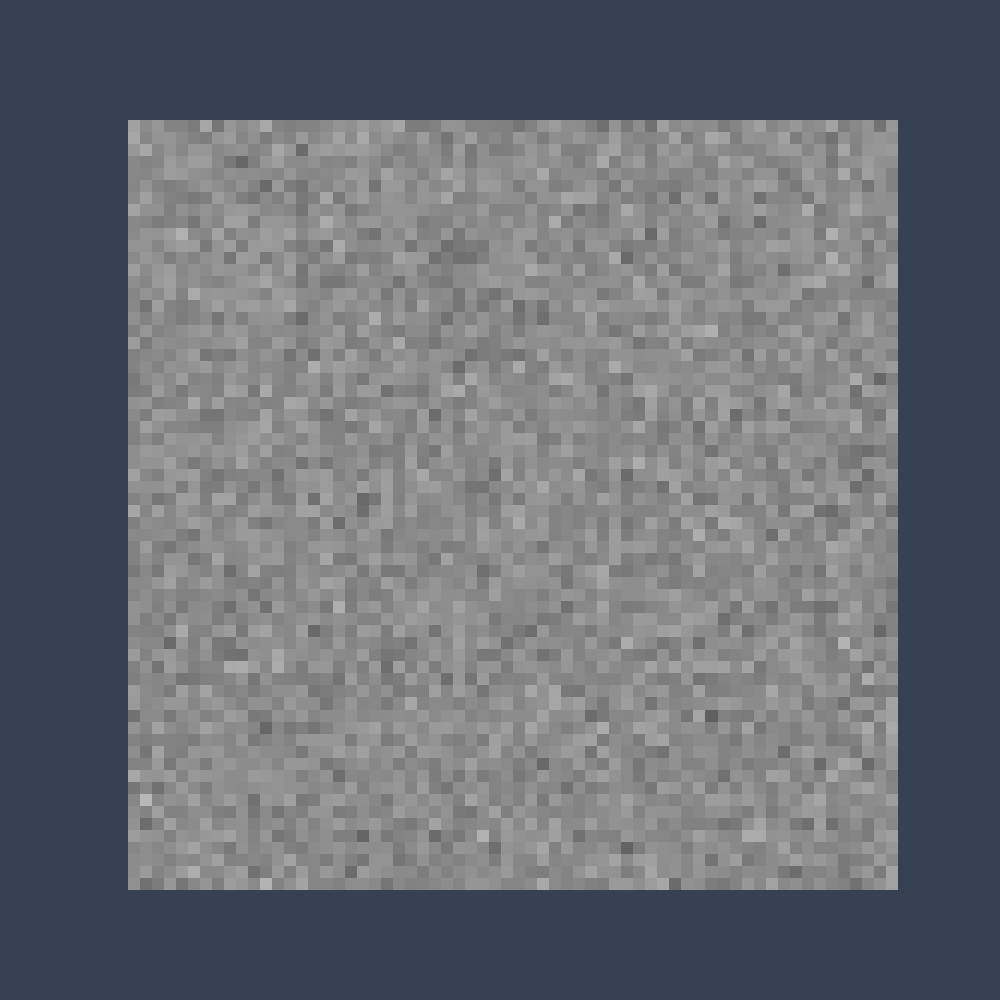

<IPython.core.display.Javascript object>


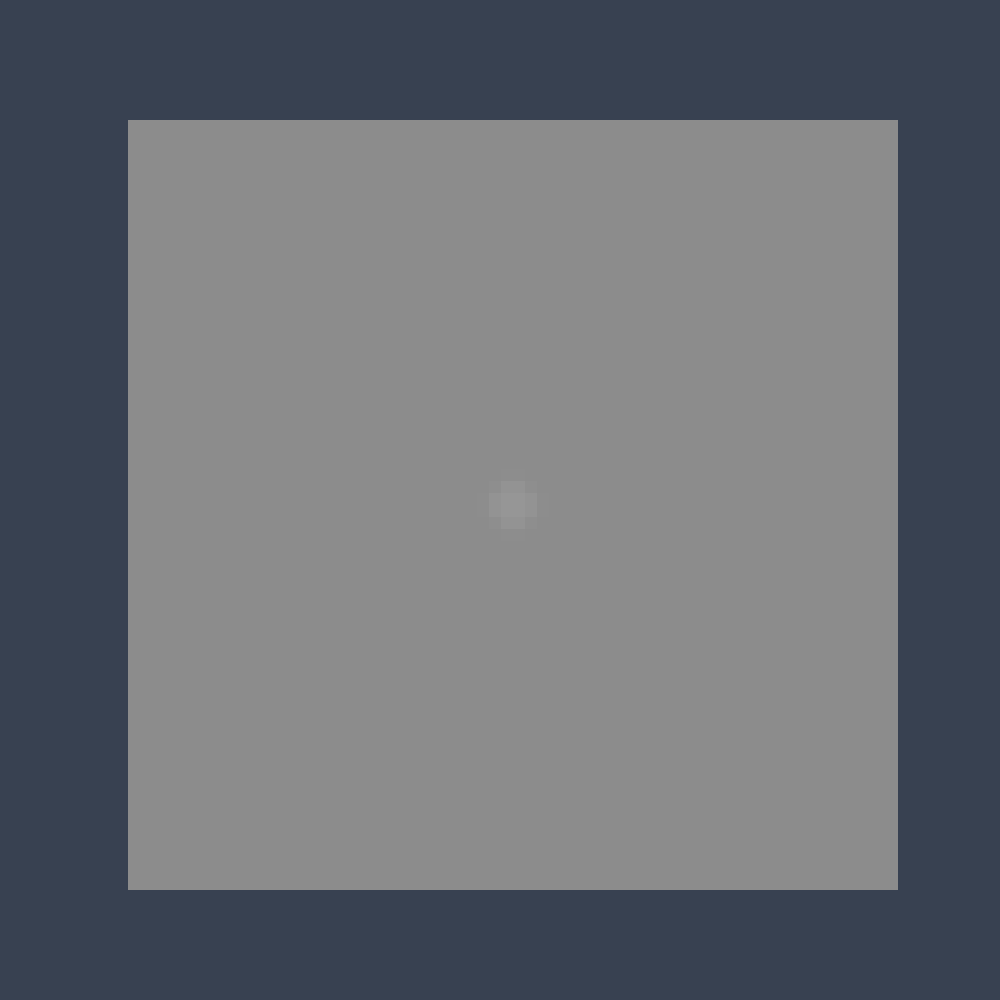

<IPython.core.display.Javascript object>


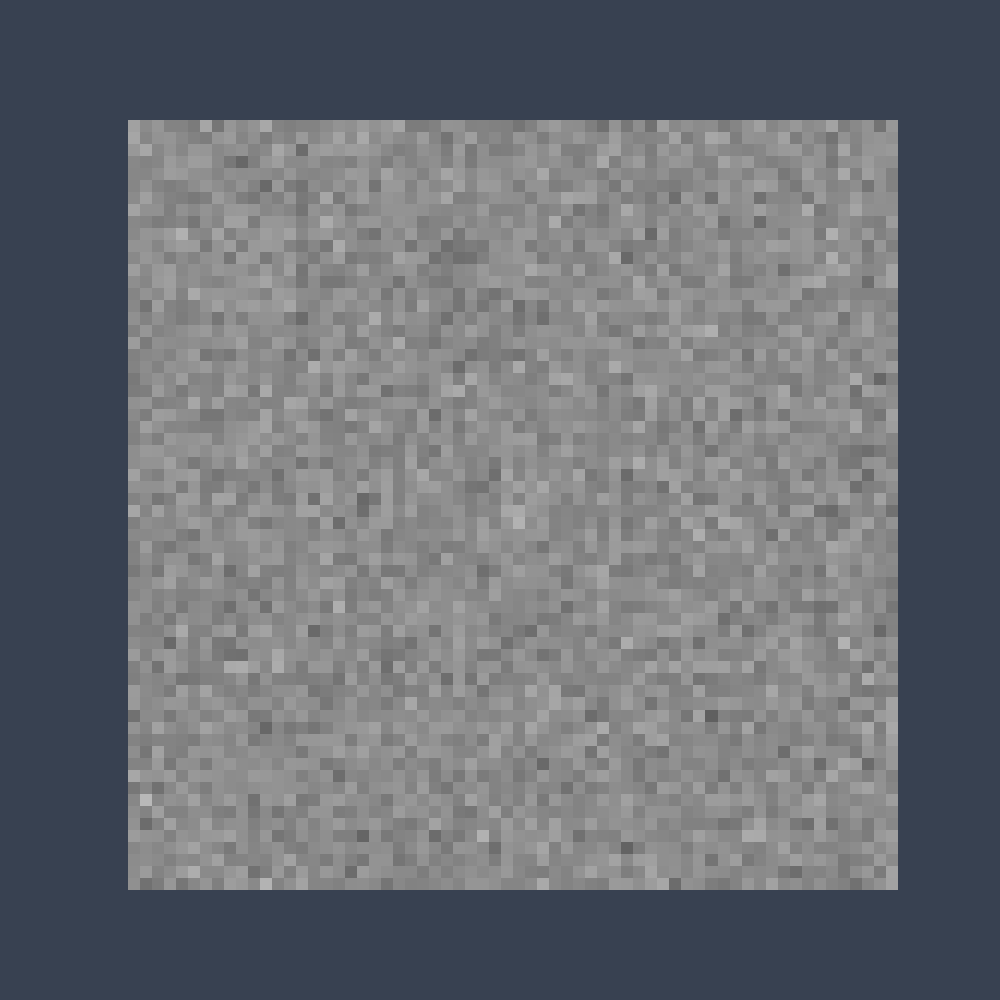

In [1]:
%matplotlib notebook

from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import scipy.ndimage as snd
import numpy as np

# Set plot theme
jtplot.style()

# Settings
signal_intensity = 10 # set signal intensity
background_intensity = 140 # set background intensity
var_noise = 150 # set var noise
gaussian_sigma = 0.5 # set sd of gaussian kernel
num_images = 1000 # number of images to create
image_size = 64
obj_dim1 = [30,34]
obj_dim2 = [31,33]

# Create list to store noise images
noise = []

# Create noise images
for n in range(num_images):
    # Create measurement noise
    noise.append(np.random.normal(0,var_noise**(0.5),(image_size,image_size)))

# Create background image
background = np.ones((image_size,image_size))*background_intensity
background_gauss = snd.filters.gaussian_filter(background,gaussian_sigma)

# Create signal image
signal = np.zeros((image_size,image_size))
signal[obj_dim1[0]:obj_dim1[1],obj_dim2[0]:obj_dim2[1]] = signal_intensity
signal[obj_dim2[0]:obj_dim2[1],obj_dim1[0]:obj_dim1[1]] = signal_intensity
signal_gauss = snd.filters.gaussian_filter(signal+background,gaussian_sigma)

# Combine background and signal
signal_absent = [background_gauss+nse for nse in noise]

# Combine signal + background + noise
signal_present = [signal_gauss+nse for nse in noise]

# Display Images (from 1st sample)

# signal absent image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(signal_absent[0],cmap='gray',vmin=0,vmax=255)

# signal image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(signal_gauss,cmap='gray',vmin=0,vmax=255)

# signal present image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(signal_present[0],cmap='gray',vmin=0,vmax=255)
plt.show()

# plot images
plt.show()

<IPython.core.display.Javascript object>


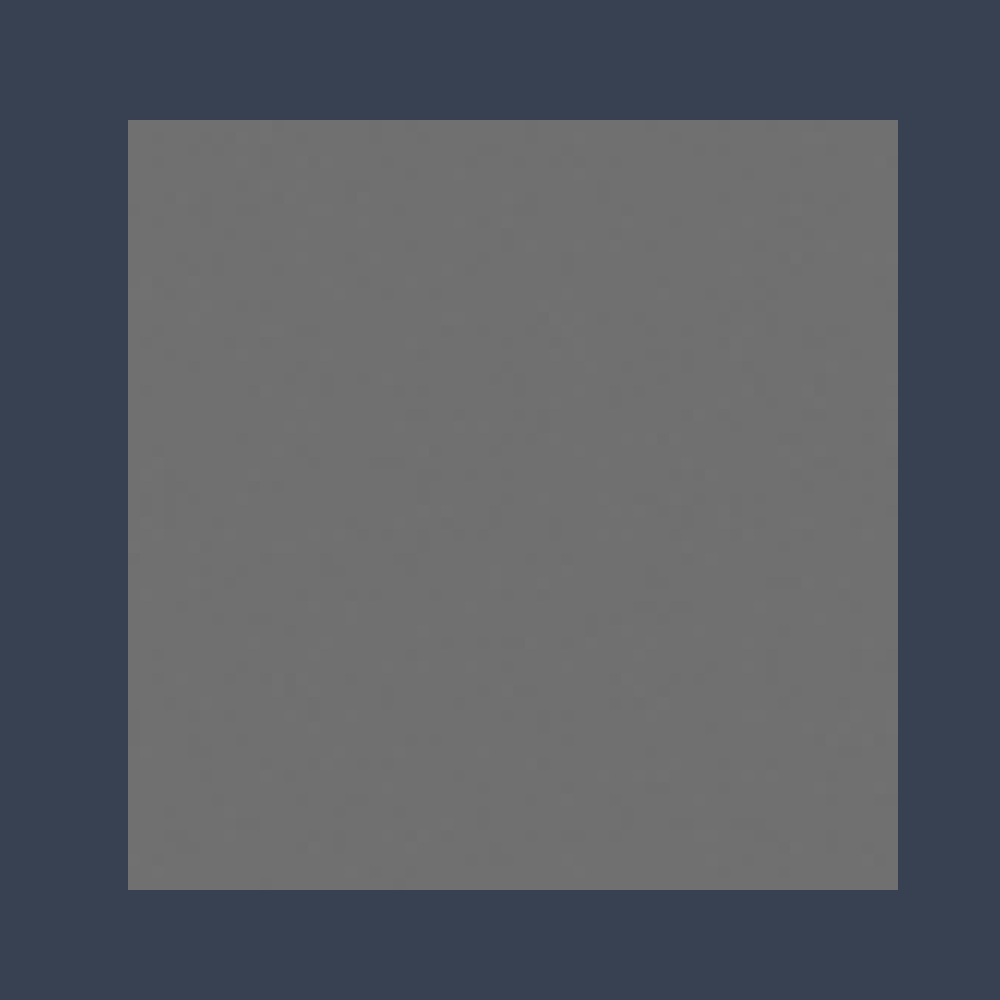

<IPython.core.display.Javascript object>


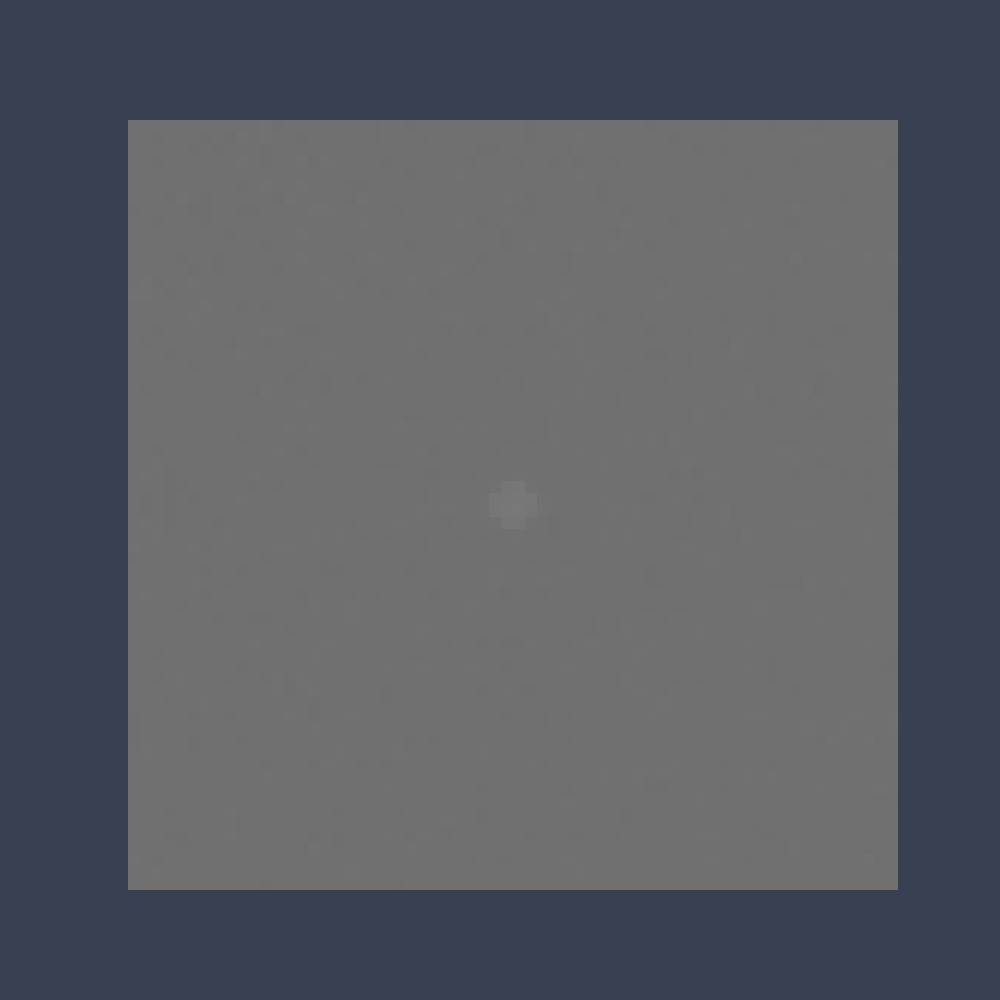

In [2]:
from functools import reduce

# split train/val set
train_signal_absent = signal_absent[0:800]
train_signal_present = signal_present[0:800]
val_signal_absent = signal_absent[800:1000]
val_signal_present = signal_present[800:1000]

# Generate average images for signal present/signal absent
avg_signal_absent = reduce(lambda x,y:x+y, train_signal_absent)/num_images
avg_signal_present = reduce(lambda x,y:x+y, train_signal_present)/num_images

# avg noise image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(avg_signal_absent,cmap='gray',vmin=0,vmax=255)

# avg signal + noise image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(avg_signal_present,cmap='gray',vmin=0,vmax=255)

# plot images
plt.show()

# flatten arrays
noise_array = np.transpose(np.vstack([n.flatten() for n in noise[0:800]]))
avg_signal_absent_array = avg_signal_absent.flatten()
avg_signal_present_array = avg_signal_present.flatten()
val_signal_absent = np.transpose(np.vstack([n.flatten() for n in val_signal_absent]))
val_signal_present = np.transpose(np.vstack([n.flatten() for n in val_signal_present]))

In [3]:
# combine validation images
data_array = np.hstack((val_signal_absent,val_signal_present))

# calculate covariance/inverse covariance matrix # only for correlated gaussian noise
#covariance = np.cov(noise_array)
#icov = np.linalg.inv(covariance)

# calculate diffence of avg 2 classes
avg_t = avg_signal_present_array-avg_signal_absent_array

# calculate test statistic
l_pw = np.matmul(avg_t,data_array)

[13486.17841326496, 13195.39133688953, 13468.128965816059, 13007.04363667981, 13597.405612655588, 13849.473311955004, 13876.17263291041, 13564.151535102996, 13686.447434093634, 13477.95954247342, 13811.30027977144, 13736.003196100935, 13670.049445060824, 12910.254845671992, 13271.053281425182, 13081.253035430345, 13613.963508120196, 13605.940929483386, 13076.325725093708, 13274.494914153087, 12920.026379028048, 13575.84968241429, 13670.963566898634, 13518.320770829807, 13479.811957901371, 13090.247895045275, 13936.739627450483, 13621.789779839397, 13113.019880310636, 13818.847259798446, 13070.18481475632, 13388.943352446528, 12862.579947168142, 13605.698370958406, 13191.395694265113, 12997.542081831889, 13326.15824621743, 13451.68532868926, 13799.00829331437, 13392.847615352866, 12714.017389466177, 13271.508426418492, 13382.068357698441, 13513.485270669684, 13431.66905799718, 13480.062934018175, 13115.8034560656, 13196.736094679007, 13604.447365677075, 13633.542184095859, 13537.4826094

<IPython.core.display.Javascript object>


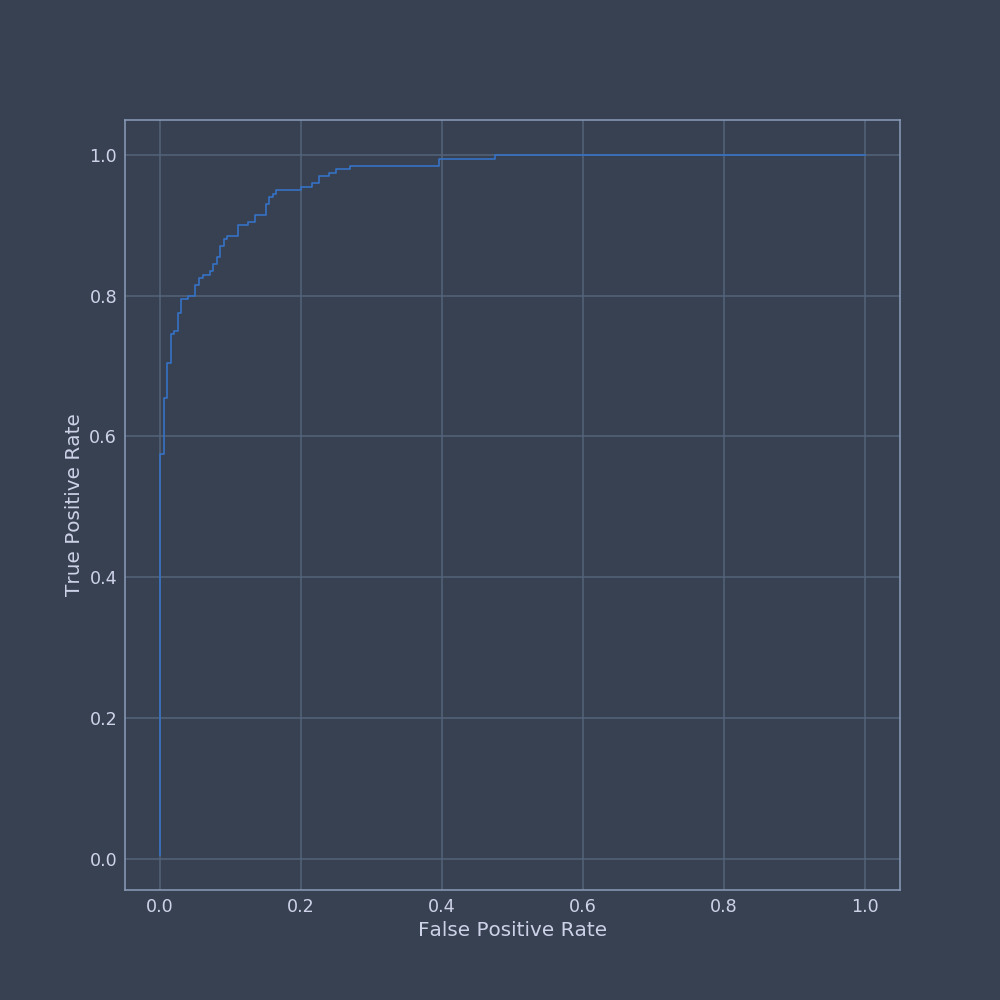

In [4]:
from sklearn.metrics import roc_auc_score,roc_curve

# print performance
print(list(l_pw))
img_cls = np.array([0]*200 + [1]*200)
[fpr,tpr,threshold] = roc_curve(img_cls,l_pw)
print("AUC: {}".format(roc_auc_score(img_cls,l_pw)))
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()